## Trabalho 2 - ECDB

### Grupo 6
Joana Araújo pg49836

Mariana Silva pg45966

Tiago Silva pg49849

## CYP P450 2C19 Inhibition

### Dataset Description: 

The CYP P450 genes are involved in the formation and breakdown (metabolism) of various molecules and chemicals within cells. Specifically, the CYP P450 2C9 plays a major role in the oxidation of both xenobiotic and endogenous compounds.

### Task Description: 

Binary Classification. Given a drug SMILES string, predict CYP2C9 inhibition.

### Dataset Statistics: 

12,513 drugs.

### References:

[1] Veith, Henrike et al. “Comprehensive characterization of cytochrome P450 isozyme selectivity across chemical libraries.” Nature biotechnology vol. 27,11 (2009): 1050-5.

## Importação de Librarys

In [191]:
import pandas as pd
import scipy.cluster.hierarchy
from scipy import stats
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, chisquare
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.decomposition import PCA


## Leitura de dados

In [192]:
df_features = pd.read_csv("cyp2c19_features.csv", sep = ",")
df_cyp2c19 = pd.read_csv("cyp2c19.csv", sep = ",")

#### Verificação da estrutura dos dados

In [193]:
print("Número de amostras =", df_features.shape[0])
print("Numero de atributos =", df_features.shape[1])
print("Dimensões: ", df_features.shape)
print()
print("Tipo de dados:")
print(df_features.dtypes)
print()
print("Valores Nulos:")
print(df_features.isnull().sum())

Número de amostras = 12513
Numero de atributos = 208
Dimensões:  (12513, 208)

Tipo de dados:
MaxEStateIndex       float64
MinEStateIndex       float64
MaxAbsEStateIndex    float64
MinAbsEStateIndex    float64
qed                  float64
                      ...   
fr_thiazole          float64
fr_thiocyan          float64
fr_thiophene         float64
fr_unbrch_alkane     float64
fr_urea              float64
Length: 208, dtype: object

Valores Nulos:
MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64


In [194]:
print("Número de amostras =", df_cyp2c19.shape[0])
print("Numero de atributos =", df_cyp2c19.shape[1])
print("Dimensões: ", df_cyp2c19.shape)
print()
print("Tipo de dados:")
print(df_cyp2c19.dtypes)
print()
print("Valores Nulos:")
print(df_cyp2c19.isnull().sum())

Número de amostras = 12513
Numero de atributos = 3
Dimensões:  (12513, 3)

Tipo de dados:
ids       float64
smiles     object
Y           int64
dtype: object

Valores Nulos:
ids       0
smiles    0
Y         0
dtype: int64


#### Nome das colunas

Descritores moleculares das drogas SMILES

In [195]:
for x in df_features.columns:
    print(x)

MaxEStateIndex
MinEStateIndex
MaxAbsEStateIndex
MinAbsEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EState_VSA7
EState

In [196]:
for x in df_cyp2c19.columns:
    print(x)

ids
smiles
Y


#### Tipo de dados 

In [197]:
type(df_features)

pandas.core.frame.DataFrame

In [198]:
type(df_cyp2c19)

pandas.core.frame.DataFrame

#### Filtragem pelo comportamento dos compostos em relação ao gene cyp2c19

In [199]:
df_inhibits = df_features[df_cyp2c19["Y"] == 1]
df_not_inhibits = df_features[df_cyp2c19["Y"] == 0]

In [200]:
df_inhibits

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
1,12.610409,-3.973681,12.610409,0.072387,0.720978,355.418,346.346,354.96430,114.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,255.05632,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,421.25900,164.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,324.13348,122.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,12.850702,-0.112825,12.850702,0.000000,0.506101,514.251,491.067,512.03815,160.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,11.645980,-0.177778,11.645980,0.106366,0.775281,317.182,304.078,316.00990,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12312,12.773980,-3.673977,12.773980,0.048304,0.735219,387.545,358.313,387.18683,146.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12346,13.490693,-1.088804,13.490693,0.134710,0.509301,458.511,428.271,458.20530,178.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12425,13.165335,-1.060316,13.165335,0.169225,0.326463,390.480,360.240,390.21548,154.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0


In [201]:
df_not_inhibits

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.609395,0.000000,11.609395,0.000000,0.884168,346.302,321.102,345.13748,124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12.762343,-0.533851,12.762343,0.182110,0.757037,380.448,356.256,380.18484,146.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,13.082813,-0.044883,13.082813,0.018472,0.457249,495.628,458.332,495.29578,194.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,11.219078,-0.045417,11.219078,0.045417,0.723254,180.232,172.168,180.03574,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,12.310647,-0.236905,12.310647,0.016681,0.695123,430.574,400.334,430.20386,162.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12507,13.015119,-0.797633,13.015119,0.004523,0.742815,317.385,294.201,317.16272,124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12508,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,263.11575,102.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12509,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,397.15253,152.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12511,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,357.15762,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ao separarmos os dataframes pelos compostos que inibem e os que não inibem, verificamos que o número de linhas do dataframe em que Y = 1 é de 5804 linhas e para Y = 0 são 6709 linhas, que indica o número de compostos que inibem e não inibem o gene CYP2C19, respetivamente.

#### Concatenação dos dataframes

De modo a facilitar o trabalho, realizamos a junção dos dataframes

In [202]:
df = pd.concat([df_cyp2c19, df_features], axis = 1)
df

,ids,smiles,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6602638.0,CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl,0,11.609395,0.000000,11.609395,0.000000,0.884168,346.302,321.102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,644675.0,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,1,12.610409,-3.973681,12.610409,0.072387,0.720978,355.418,346.346,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12509,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12510,16758817.0,CCN1C(=O)[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@...,1,12.817440,-0.985371,12.817440,0.131139,0.406549,335.356,314.188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12511,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Análise descritiva, filtragem e pré-processamento dos dados

O conjunto de dados fornecido contém informações sobre drogas, cada uma identificada por um ID único. A composição química de cada droga é representada por uma sequência de caracteres denominada SMILES. Além disso, cada droga possui vários descritores associados, alguns numéricos (tais como qed, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex e MinAbsEStateIndex) que descrevem propriedades específicas, e outros binários (0 ou 1), que indicam a presença ou ausência de determinados atributos, bem como a presença ou ausência de subestruturas moléculares (tais como fr_sulfide, fr_sulfonamd, fr_sulfone, fr_term_acetylene, fr_tetrazole )

Uma das propriedades mais importantes é indicada pela letra "Y" que indica se a molécula não inibe (0) ou inibe (1) a enzima cyp2c19.


Algumas tarefas de pré-processamento que podem ser necessárias incluem:

- Remoção de valores duplicados e tratamento de valores ausentes

- Conversão de tipos de dados

- Normalização de dados

- Remoção de colunas irrelevantes

In [203]:
print("Valores nulos:")
print(df.isnull().sum())

Valores nulos:
ids                 0
smiles              0
Y                   0
MaxEStateIndex      0
MinEStateIndex      0
                   ..
fr_thiazole         0
fr_thiocyan         0
fr_thiophene        0
fr_unbrch_alkane    0
fr_urea             0
Length: 211, dtype: int64


In [204]:
print("Valores duplicados:")
print(df.duplicated(subset=["ids"], keep = False))

Valores duplicados:
0        False
1        False
2        False
3        False
4        False
         ...  
12508    False
12509    False
12510    False
12511    False
12512    False
Length: 12513, dtype: bool


In [205]:
print("Número de valores únicos em cada coluna: ")
print(df.nunique())

Número de valores únicos em cada coluna: 
ids                 12513
smiles              12513
Y                       2
MaxEStateIndex      12165
MinEStateIndex      12041
                    ...  
fr_thiazole             5
fr_thiocyan             2
fr_thiophene            3
fr_unbrch_alkane       20
fr_urea                 4
Length: 211, dtype: int64


In [206]:
print("Dimensões do dataframe concatenado: ", df.shape)

Dimensões do dataframe concatenado:  (12513, 211)


Verificamos que o dataframe tem 12513 linhas, que indicam as drogas analisadas, e 211 colunas, que mostam os parâmetros das drogas. Além de não possui nenhum valor nulo nem duplicado.

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12513 entries, 0 to 12512
Columns: 211 entries, ids to fr_urea
dtypes: float64(209), int64(1), object(1)
memory usage: 20.1+ MB


In [208]:
df.describe()

,ids,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1.251300e+04,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,...,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000
mean,6.134883e+06,0.463838,11.301366,-0.878665,11.301366,0.191314,0.613183,355.661700,335.440396,355.260983,...,0.108767,0.078398,0.012387,0.003516,0.011508,0.033725,0.000160,0.065692,0.121793,0.041956
std,1.787283e+07,0.498710,2.660753,1.453325,2.660753,0.222518,0.190299,105.240375,99.547443,105.127283,...,0.332943,0.278734,0.113464,0.059197,0.109617,0.194590,0.012642,0.255064,0.774348,0.206003
min,1.080000e+02,0.000000,2.248446,-7.603764,2.248446,0.000000,0.021258,33.030000,30.006000,33.021465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.324253e+06,0.000000,10.976106,-1.039330,10.976106,0.043847,0.484477,292.364000,275.145000,292.124540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.233964e+06,0.000000,12.262559,-0.394431,12.262559,0.118089,0.632687,348.478000,328.264000,348.169860,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.004272e+06,1.000000,12.911008,-0.063559,12.911008,0.234632,0.772393,409.511000,386.258000,409.146030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.460310e+08,1.000000,17.398045,3.500000,17.398045,3.811700,0.947210,1664.922000,1579.242000,1663.492300,...,4.000000,2.000000,2.000000,1.000000,2.000000,4.000000,1.000000,2.000000,26.000000,3.000000


In [209]:
df_features.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.0,...,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000
mean,11.301366,-0.878665,11.301366,0.191314,0.613183,355.661700,335.440396,355.260983,130.888995,0.0,...,0.108767,0.078398,0.012387,0.003516,0.011508,0.033725,0.000160,0.065692,0.121793,0.041956
std,2.660753,1.453325,2.660753,0.222518,0.190299,105.240375,99.547443,105.127283,39.397215,0.0,...,0.332943,0.278734,0.113464,0.059197,0.109617,0.194590,0.012642,0.255064,0.774348,0.206003
min,2.248446,-7.603764,2.248446,0.000000,0.021258,33.030000,30.006000,33.021465,14.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.976106,-1.039330,10.976106,0.043847,0.484477,292.364000,275.145000,292.124540,106.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.262559,-0.394431,12.262559,0.118089,0.632687,348.478000,328.264000,348.169860,128.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.911008,-0.063559,12.911008,0.234632,0.772393,409.511000,386.258000,409.146030,150.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.398045,3.500000,17.398045,3.811700,0.947210,1664.922000,1579.242000,1663.492300,606.000000,0.0,...,4.000000,2.000000,2.000000,1.000000,2.000000,4.000000,1.000000,2.000000,26.000000,3.000000


In [210]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12513 entries, 0 to 12512
Columns: 208 entries, MaxEStateIndex to fr_urea
dtypes: float64(208)
memory usage: 19.9 MB


In [211]:
df_cyp2c19.describe()

,ids,Y
count,1.251300e+04,12513.000000
mean,6.134883e+06,0.463838
std,1.787283e+07,0.498710
min,1.080000e+02,0.000000
25%,1.324253e+06,0.000000
50%,3.233964e+06,0.000000
75%,4.004272e+06,1.000000
max,1.460310e+08,1.000000


In [212]:
df_cyp2c19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12513 entries, 0 to 12512
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ids     12513 non-null  float64
 1   smiles  12513 non-null  object 
 2   Y       12513 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 293.4+ KB


In [213]:
df_inhibits.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.0,...,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.0,5804.000000,5804.000000,5804.000000
mean,11.289839,-0.833439,11.289839,0.199324,0.610073,366.888945,347.401234,366.413928,132.880083,0.0,...,0.162991,0.087181,0.015851,0.001895,0.018091,0.051344,0.0,0.094935,0.094590,0.029635
std,2.770427,1.514016,2.770427,0.218573,0.182071,82.334175,78.235508,82.226659,30.988873,0.0,...,0.395523,0.290550,0.127640,0.043497,0.134579,0.235816,0.0,0.301839,0.508936,0.174599
min,2.248446,-7.603764,2.248446,0.000000,0.034375,101.105000,94.049000,101.047676,40.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,11.369020,-0.788700,11.369020,0.048123,0.482515,311.060500,294.201000,310.168120,112.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,12.367514,-0.344053,12.367514,0.123043,0.625243,358.399000,340.151500,358.040800,130.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,12.942530,-0.022360,12.942530,0.249791,0.759089,414.267250,392.354000,413.219423,150.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,15.202768,1.200894,15.202768,1.207516,0.947210,1437.614000,1352.942000,1436.600600,548.000000,0.0,...,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.0,2.000000,13.000000,2.000000


In [214]:
df_inhibits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5804 entries, 1 to 12510
Columns: 208 entries, MaxEStateIndex to fr_urea
dtypes: float64(208)
memory usage: 9.3 MB


In [215]:
df_not_inhibits.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.0,...,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,11.311339,-0.917790,11.311339,0.184384,0.615874,345.948936,325.092997,345.612496,129.166493,0.0,...,0.061857,0.070800,0.009390,0.004919,0.005813,0.018483,0.000298,0.040394,0.145327,0.052616
std,2.562254,1.397632,2.562254,0.225663,0.197115,120.792053,113.833338,120.682780,45.364730,0.0,...,0.258236,0.267882,0.099498,0.069966,0.081698,0.148390,0.017264,0.202862,0.945071,0.229212
min,2.269884,-7.117338,2.269884,0.000000,0.021258,33.030000,30.006000,33.021465,14.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.816645,-1.135395,10.816645,0.040522,0.486005,271.324000,254.188000,271.081800,100.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.128490,-0.463017,12.128490,0.112700,0.642759,337.427000,316.300000,337.146030,126.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.879924,-0.099838,12.879924,0.224974,0.781833,404.426000,380.278000,404.119720,152.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.398045,3.500000,17.398045,3.811700,0.946895,1664.922000,1579.242000,1663.492300,606.000000,0.0,...,4.000000,2.000000,2.000000,1.000000,2.000000,4.000000,1.000000,2.000000,26.000000,3.000000


In [216]:
df_not_inhibits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6709 entries, 0 to 12512
Columns: 208 entries, MaxEStateIndex to fr_urea
dtypes: float64(208)
memory usage: 10.7 MB


In [217]:
#range
df.apply(lambda x: str(x.min())+"---"+str (x.max()))

ids                                               108.0---146030960.0
smiles              Br.C/C(=N/NC1=NCCN1)c1cn(C2=NCCN2)nc1C---c1nnc...
Y                                                               0---1
MaxEStateIndex                                  2.2484462---17.398045
MinEStateIndex                                       -7.6037636---3.5
                                          ...                        
fr_thiazole                                                 0.0---4.0
fr_thiocyan                                                 0.0---1.0
fr_thiophene                                                0.0---2.0
fr_unbrch_alkane                                           0.0---26.0
fr_urea                                                     0.0---3.0
Length: 211, dtype: object

In [218]:
print(df.columns.tolist())

['ids', 'smiles', 'Y', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10

Comportamento dos compostos no gene cyp2c19

0    6709
1    5804
Name: Y, dtype: int64


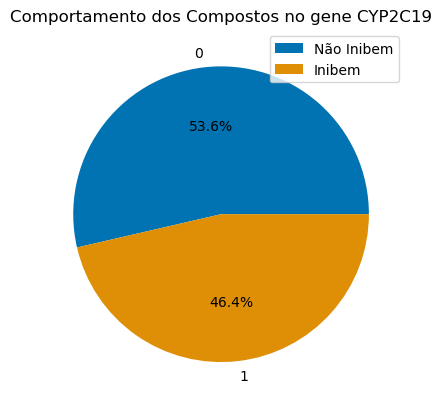

In [219]:
counts = df['Y'].value_counts()
print(counts)
colours = sns.color_palette("colorblind")[0:2]
plt.pie(counts.values, labels=counts.index, autopct = "%1.1f%%", colors=colours)


plt.title('Comportamento dos Compostos no gene CYP2C19')
plt.legend(["Não Inibem","Inibem"])
plt.show()

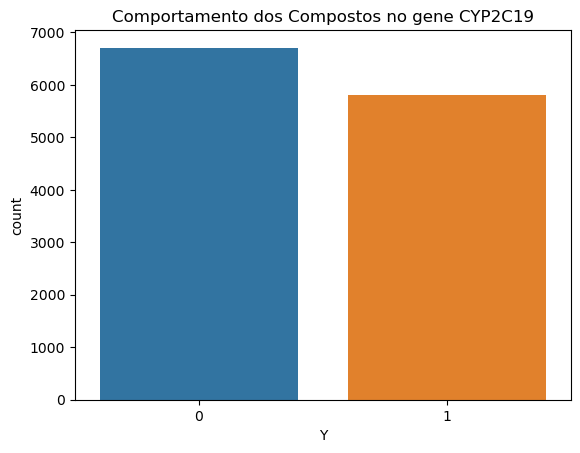

In [220]:
sns.countplot(x='Y', data=df_cyp2c19)
plt.title('Comportamento dos Compostos no gene CYP2C19')
plt.show()

A partir dos gráficos anteriores, pieplot e countplot, conseguimos percebemos que existem mais compostos que não inibem o cyp2c19 (53.6%) do que os que inibem (46.4%).


## Escolha de dados

No dataframe df_features estão apresentadas algumas propriedades dos compostos que são analisadas nestes estudos, que pretendem mostrar a inibição de um gene quando confrontado com determinado composto.

Selecionamos as colunas que achamos mais pertinentes, passamos a enumerar e descrevê-las.

**BertzCT** :  Esta coluna representa a complexidade estrutural da molécula. É uma medida de descritor molecular que faz parte de um conjunto de descritores que são usados ​​em análises de QSAR (Quantitative Structure-Activity Relationship) para prever a atividade de compostos em relação a uma determinada proteína, neste caso, a cyp2c19. Em geral, quanto maior o valor de BertzCT, mais complexa é a molécula e mais difícil pode ser a sua interação com uma determinada proteína ou enzima.

**MaxEStateIndex**: Esta coluna representa o valor máximo do índice E-estado, que é uma medida da soma das contribuições atómicas para o estado eletrónico de uma molécula. Valores elevados de MaxEStateIndex podem indicar maior densidade eletrónica e potencial para atividade inibitória.

**MinEStateIndex**: Esta coluna representa o valor mínimo do índice E-estado. Valores baixos de MinEStateIndex podem indicar menor densidade eletrónica e potencial para atividade inibitória.

**MaxAbsEStateIndex**: Esta coluna representa o valor máximo absoluto do índice E-estado. Valores elevados de MaxAbsEStateIndex podem indicar maior densidade eletrónica e potencial para atividade inibitória.

**MinAbsEStateIndex**: Esta coluna representa o valor mínimo absoluto do índice E-estado. Valores baixos de MinAbsEStateIndex podem indicar menor densidade eletrónica e potencial para atividade inibitória.

**MaxPartialCharge**: Esta coluna representa a carga parcial máxima de uma molécula, que é uma medida da distribuição de carga dentro de uma molécula. Valores elevados de MaxPartialCharge podem indicar interações eletrostáticas mais fortes e potencial para atividade inibitória.

**MinPartialCharge**: Esta coluna representa a carga parcial mínima de uma molécula, que é uma medida da distribuição de carga dentro de uma molécula. Valores baixos de MinPartialCharge podem indicar interações eletrostáticas mais fracas e potencial para atividade inibitória.

**NumHAcceptors**: Esta coluna representa o número de átomos aceitores de ligações de hidrogénio numa molécula. Valores mais elevados de NumHAcceptors podem indicar a presença de grupos funcionais que podem formar ligações de hidrogénio com proteínas alvo, o que poderia potencialmente contribuir para a atividade inibitória.

**NumHDonors**: Esta coluna representa o número de átomos doadores de ligações de hidrogénio numa molécula. Valores mais elevados de NumHDonors podem indicar a presença de grupos funcionais que podem doar ligações de hidrogénio a proteínas alvo, o que poderia potencialmente contribuir para a atividade inibitória.

**TPSA**: Esta coluna representa a área superficial polar topológica de uma molécula, que é uma medida da superfície de uma molécula que é polar ou capaz de formar ligações de hidrogénio. Valores mais elevados de TPSA podem indicar maior área superficial disponível para interações com proteínas alvo, o que poderia potencialmente contribuir para a atividade inibitória.

**MolWt** : Esta coluna representa um descritor que indica o peso molecular de um composto.

**NumValenceElectrons** : Esta coluna indica o número de eletrões de valência.

**qed** : Esta coluna estima de forma quantitativa a drug-likeness. Varia de 0 a 1, com pontuações mais altas indicando uma maior probabilidade de o composto ser oralmente biodisponível e ter propriedades farmacológicas desejáveis.

**FpDensityMorgan** : Esta coluna representa uma medida de densidade de fragmentos circulares (ou anéis) em torno de um átomo central em uma molécula, calculada usando o algoritmo de Morgan. Em geral, um valor mais alto de FpDensityMorgan3 indica uma maior densidade de trímeros na molécula, o que pode ser associado a uma maior complexidade estrutural e a uma maior dificuldade de interação com a proteína ou enzima alvo.

In [221]:
selected_data = df[["BertzCT", "MaxEStateIndex","MinEStateIndex","MaxAbsEStateIndex","MinAbsEStateIndex","MaxPartialCharge","MinPartialCharge", "TPSA","qed", "NumValenceElectrons", "MolWt", "Y", "FpDensityMorgan3","FpDensityMorgan2","FpDensityMorgan1"]]

selected_data

,BertzCT,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,MaxPartialCharge,MinPartialCharge,TPSA,qed,NumValenceElectrons,MolWt,Y,FpDensityMorgan3,FpDensityMorgan2,FpDensityMorgan1
0,488.27930,11.609395,0.000000,11.609395,0.000000,0.223859,-0.367762,35.58,0.884168,124.0,346.302,0,2.454546,1.909091,1.227273
1,997.90656,12.610409,-3.973681,12.610409,0.072387,0.395588,-0.413988,84.66,0.720978,114.0,355.418,1,2.681818,2.045454,1.272727
2,661.56570,6.126257,0.660427,6.126257,0.660427,0.180998,-0.258611,41.57,0.756902,88.0,255.708,1,2.388889,1.611111,0.888889
3,974.84500,5.719940,-0.219974,5.719940,0.075509,0.173203,-0.496400,72.20,0.605920,164.0,421.549,1,2.387097,1.709677,1.000000
4,818.19965,12.040634,-0.208718,12.040634,0.006714,0.243448,-0.496407,94.82,0.728361,122.0,324.344,1,2.791667,2.000000,1.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,483.83765,12.346902,-0.801800,12.346902,0.024123,0.232996,-0.388692,74.68,0.682518,102.0,263.293,0,2.578947,1.894737,1.210526
12509,891.82336,13.390758,-1.019880,13.390758,0.162294,0.233632,-0.389652,88.60,0.455270,152.0,397.427,0,2.586207,1.827586,1.068966
12510,638.99200,12.817440,-0.985371,12.817440,0.131139,0.233304,-0.389652,88.60,0.406549,130.0,335.356,1,2.708333,2.000000,1.250000
12511,747.82825,13.179767,-1.161112,13.179767,0.077392,0.233570,-0.390077,94.91,0.772281,138.0,357.406,0,2.346154,1.653846,1.000000


In [222]:
selected_data.describe()

,BertzCT,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,MaxPartialCharge,MinPartialCharge,TPSA,qed,NumValenceElectrons,MolWt,Y,FpDensityMorgan3,FpDensityMorgan2,FpDensityMorgan1
count,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000
mean,838.838292,11.301366,-0.878665,11.301366,0.191314,0.267123,-0.419461,72.957876,0.613183,130.888995,355.661700,0.463838,2.465329,1.812758,1.109191
std,348.154798,2.660753,1.453325,2.660753,0.222518,0.083521,0.083305,36.835109,0.190299,39.397215,105.240375,0.498710,0.346179,0.278158,0.213212
min,2.000000,2.248446,-7.603764,2.248446,0.000000,-0.218887,-1.000000,0.000000,0.021258,14.000000,33.030000,0.000000,0.260417,0.208333,0.145833
25%,610.475700,10.976106,-1.039330,10.976106,0.043847,0.226979,-0.489534,50.690000,0.484477,106.000000,292.364000,0.000000,2.318182,1.677419,0.972973
50%,813.547200,12.262559,-0.394431,12.262559,0.118089,0.269962,-0.444678,68.540000,0.632687,128.000000,348.478000,0.000000,2.518518,1.833333,1.100000
75%,1038.513000,12.911008,-0.063559,12.911008,0.234632,0.323558,-0.354442,88.160000,0.772393,150.000000,409.511000,1.000000,2.687500,2.000000,1.240000
max,5407.282000,17.398045,3.500000,17.398045,3.811700,0.673213,-0.054949,701.770000,0.947210,606.000000,1664.922000,1.000000,3.312500,2.750000,2.000000


## Standarização dos dados

In [223]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

#data_scale = scaler.fit_transform(selected_data)
data_scale = scaler.fit_transform(selected_data)

#data_scale.columns = ["MaxEStateIndex","MinEStateIndex","MaxAbsEStateIndex","MinAbsEStateIndex","MaxPartialCharge","MinPartialCharge","NumHAcceptors","NumHDonors","TPSA"]

data_scale


array([[-1.00694577,  0.11577211,  0.60461352, ..., -0.03115204,
         0.34633779,  0.55384487],
       [ 0.45690775,  0.49200172, -2.12969499, ...,  0.62539178,
         0.83659458,  0.76704279],
       [-0.50919785, -1.94505724,  1.05905673, ..., -0.22082067,
        -0.72496402, -1.03329312],
       ...,
       [-0.57403856,  0.56981401, -0.07342512, ...,  0.70198842,
         0.67317577,  0.66044383],
       [-0.26141728,  0.70599407, -0.19435318, ..., -0.34427354,
        -0.57132276, -0.51214333],
       [-1.33720302, -0.2201857 ,  0.27374281, ...,  2.22426891,
         2.5765263 ,  2.79869076]])

In [224]:
print("Média:",data_scale.mean())
print("Desvio Padrão: ", data_scale.std())
#Os dados estão standardizados, pois a média aproxima-se de zero e o desvio padrão é igual a um.

Média: 1.3022547276244677e-17
Desvio Padrão:  1.0


In [225]:
type(data_scale)

numpy.ndarray

In [226]:
data_s = pd.DataFrame(data_scale)
type(data_s)
data_s.columns = ["BertzCT", "MaxEStateIndex","MinEStateIndex","MaxAbsEStateIndex","MinAbsEStateIndex","MaxPartialCharge","MinPartialCharge", "TPSA","qed", "NumValenceElectrons", "MolWt", "Y", "FpDensityMorgan3","FpDensityMorgan2","FpDensityMorgan1"]

data_s

,BertzCT,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,MaxPartialCharge,MinPartialCharge,TPSA,qed,NumValenceElectrons,MolWt,Y,FpDensityMorgan3,FpDensityMorgan2,FpDensityMorgan1
0,-1.006946,0.115772,0.604614,0.115772,-0.859802,-0.518022,0.620632,-1.014776,1.424047,-0.174867,-0.088940,-0.930111,-0.031152,0.346338,0.553845
1,0.456908,0.492002,-2.129695,0.492002,-0.534481,1.538189,0.065702,0.317702,0.566468,-0.428702,-0.002316,1.075140,0.625392,0.836595,0.767043
2,-0.509198,-1.945057,1.059057,-1.945057,2.108288,-1.031214,1.930944,-0.852152,0.755253,-1.088674,-0.949804,1.075140,-0.220821,-0.724964,-1.033293
3,0.390666,-2.097771,0.453248,-2.097771,-0.520450,-1.124549,-0.923614,-0.020576,-0.038172,0.840474,0.626090,1.075140,-0.225997,-0.370597,-0.512143
4,-0.059282,0.277853,0.460994,0.277853,-0.829630,-0.283465,-0.923697,0.593537,0.605268,-0.225634,-0.297594,1.075140,0.942721,0.673176,0.465013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,-1.019704,0.392963,0.052891,0.392963,-0.751390,-0.408616,0.369372,0.046754,0.364361,-0.733304,-0.877728,-0.930111,0.328219,0.294732,0.475298
12509,0.152194,0.785295,-0.097171,0.785295,-0.130422,-0.401001,0.357852,0.424670,-0.829850,0.535872,0.396872,-0.930111,0.349191,0.053311,-0.188671
12510,-0.574039,0.569814,-0.073425,0.569814,-0.270437,-0.404934,0.357852,0.424670,-1.085881,-0.022566,-0.192954,1.075140,0.701988,0.673176,0.660444
12511,-0.261417,0.705994,-0.194353,0.705994,-0.511989,-0.401750,0.352742,0.595980,0.836072,0.180502,0.016575,-0.930111,-0.344274,-0.571323,-0.512143


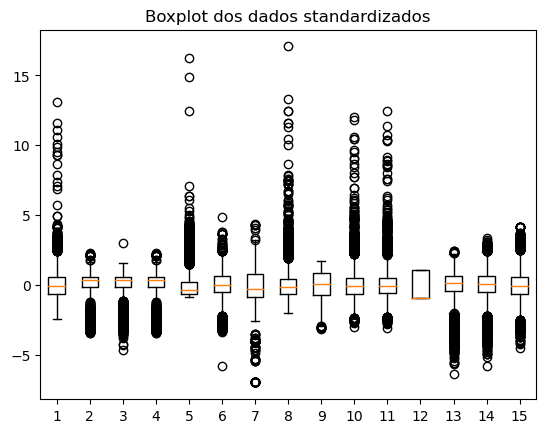

In [227]:
plt.boxplot(data_scale)
plt.title("Boxplot dos dados standardizados")
plt.show()

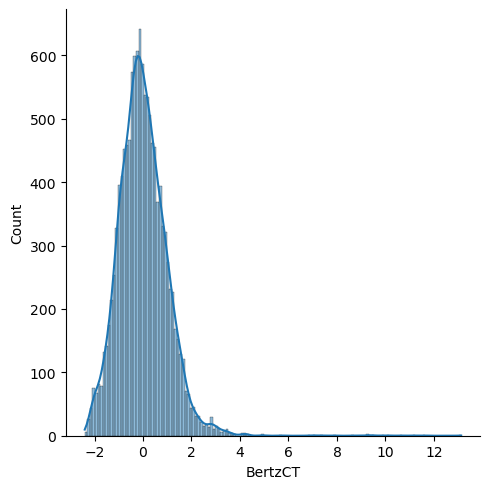

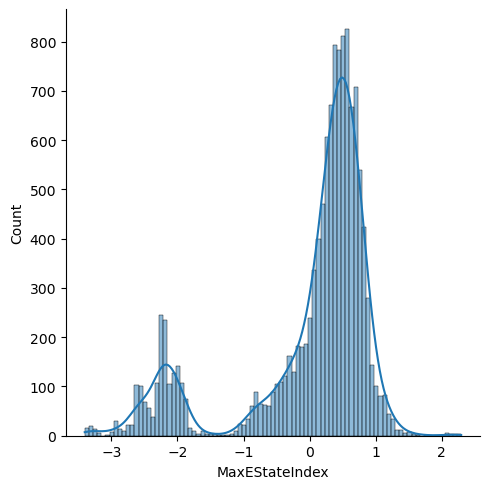

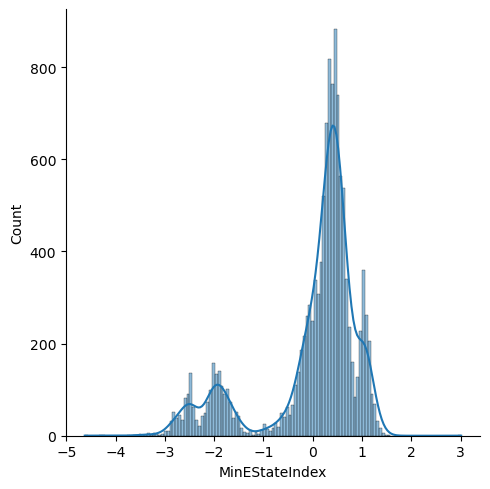

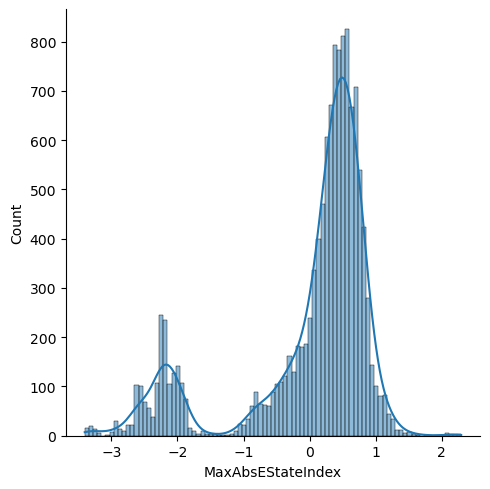

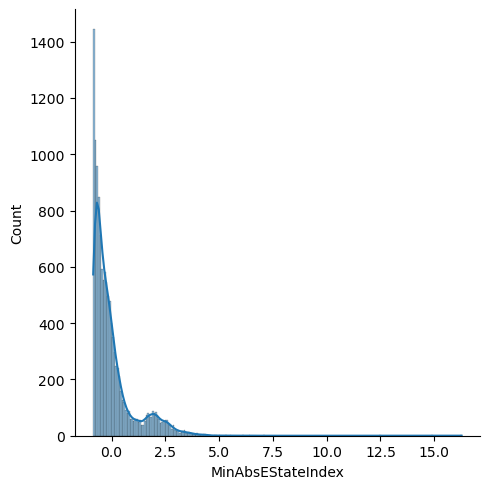

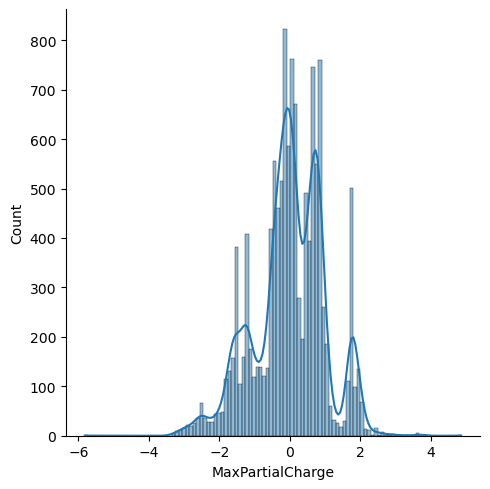

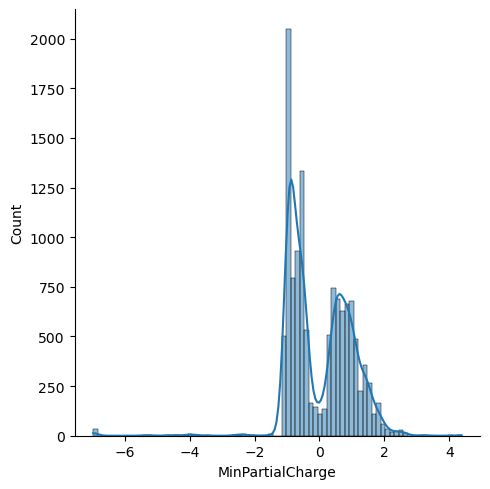

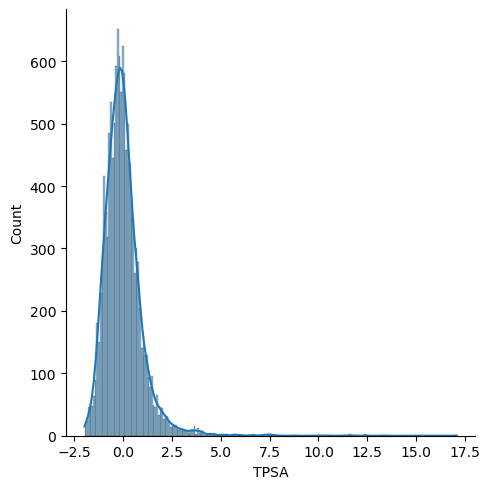

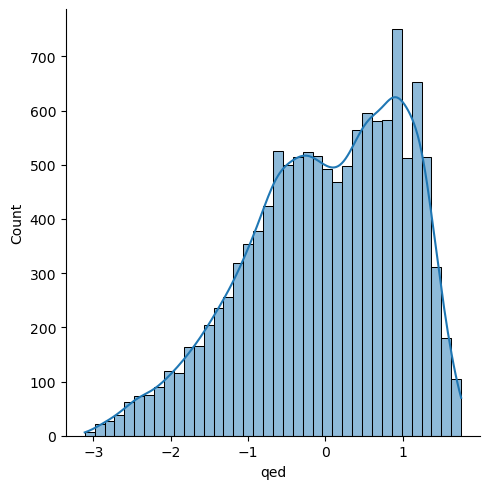

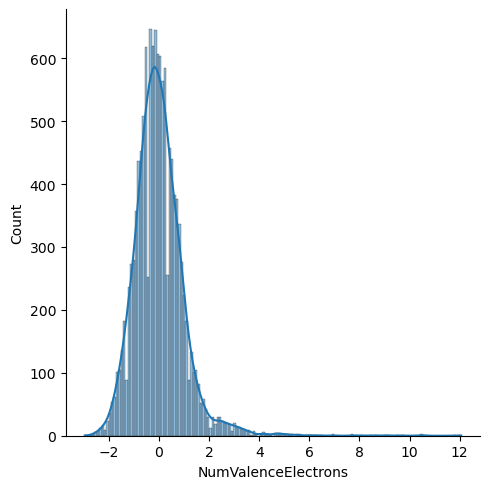

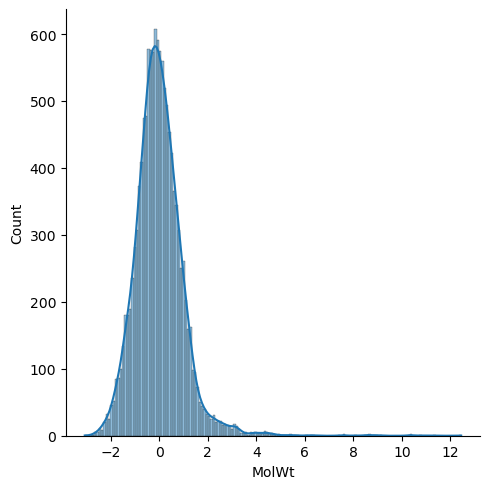

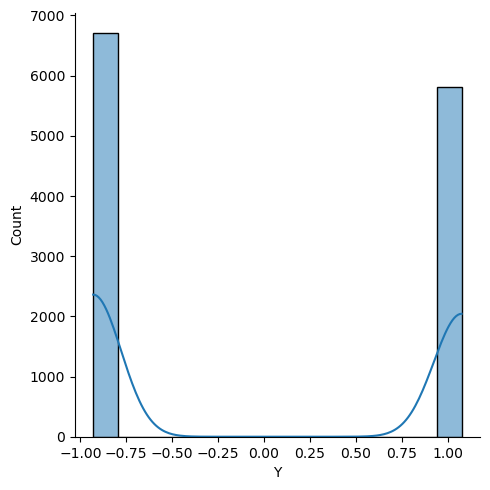

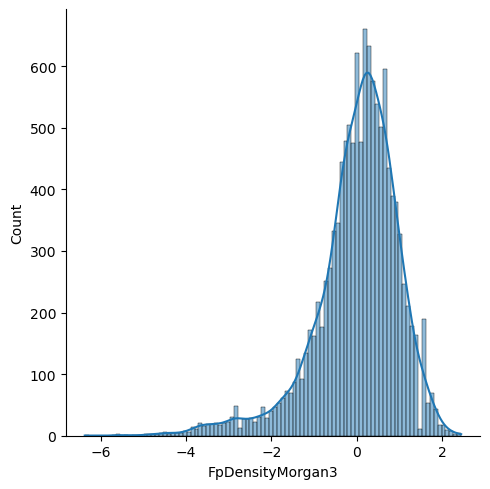

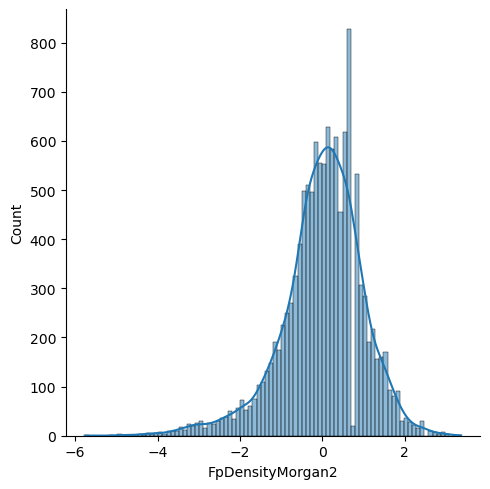

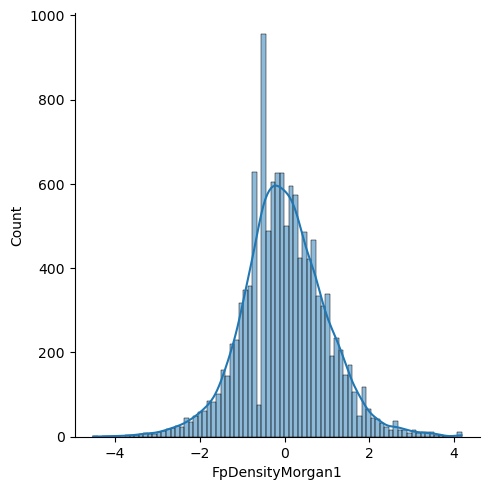

In [228]:
for col in data_s.select_dtypes(include=np.number).columns:
    sns.displot(data_s[col], kde=True)
    plt.show()

In [229]:
from sklearn.preprocessing import StandardScaler
#standardização dos fragmentos

cols_fr = df.filter(regex='^fr_').columns

scaler = StandardScaler()
df[cols_fr] = scaler.fit_transform(df[cols_fr])
df[cols_fr] 

,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-0.230982,-0.268182,-0.256877,-0.187528,-0.13945,-0.880610,-0.297123,-0.199906,-0.269935,-0.27024,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
1,-0.230982,-0.268182,-0.256877,-0.187528,-0.13945,-0.880610,-0.297123,-0.199906,-0.269935,-0.27024,...,-0.326696,3.306514,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,3.663181,-0.157291,-0.203677
2,-0.230982,-0.268182,-0.256877,-0.187528,-0.13945,1.123587,2.798545,-0.199906,-0.269935,-0.27024,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
3,-0.230982,-0.268182,-0.256877,-0.187528,-0.13945,2.459719,-0.297123,-0.199906,-0.269935,-0.27024,...,-0.326696,-0.281277,-0.109177,-0.059403,9.018047,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
4,-0.230982,-0.268182,-0.256877,-0.187528,-0.13945,2.459719,-0.297123,-0.199906,-0.269935,-0.27024,...,-0.326696,-0.281277,-0.109177,-0.059403,9.018047,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,-0.230982,1.194661,1.351077,-0.187528,-0.13945,-0.880610,-0.297123,-0.199906,-0.269935,-0.27024,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
12509,-0.230982,1.194661,1.351077,-0.187528,-0.13945,-0.880610,-0.297123,-0.199906,-0.269935,-0.27024,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
12510,-0.230982,1.194661,1.351077,-0.187528,-0.13945,-0.880610,-0.297123,-0.199906,-0.269935,-0.27024,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
12511,-0.230982,2.657504,2.959031,-0.187528,-0.13945,-0.880610,-0.297123,-0.199906,-0.269935,-0.27024,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677


In [230]:
#filtração das colunas em que Y == 1
df_filtered = df.loc[df['Y'] == 1].filter(regex='^fr_')

#média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: fr_benzene
Coluna com menor média: fr_COO2


In [231]:
#filtração das colunas em que Y == 0
df_filtered = df.loc[df['Y'] == 0].filter(regex='^fr_')

col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: fr_COO2
Coluna com menor média: fr_benzene


A partir desta informação percebemos que quando Y = 1, ou seja, inibe cyp2c19, o composto com maior média é o fr_benzene e o com menor média é o fr_COO2. Por outro lado, quando Y=0, ou seja, não há inibição de cyp2c19, o composto com maior média é fr_COO2 e com menor média é o fr_benzene. Verifica-se um oposto nos casos, pelo que se pode prever que o composto fr_benzene pode estar relacionado com a inibição de cyp2c19. 

In [232]:
from sklearn.preprocessing import StandardScaler

cols_SMR = df.filter(regex='^SMR_VSA').columns

scaler = StandardScaler()
df[cols_SMR] = scaler.fit_transform(df[cols_SMR])
df[cols_SMR]

,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9
0,-0.794903,1.469107,-0.246056,-0.702759,-0.565239,0.148597,1.940887,-1.134467,0.0,-0.800333
1,0.386925,2.460392,-0.246056,-1.379096,-0.565239,-0.559127,-0.848612,-0.293891,0.0,-0.800333
2,-1.236379,-0.746285,-0.246056,0.716390,-0.565239,-1.065615,-1.159452,0.242220,0.0,2.071439
3,-0.800214,-1.611947,-0.246056,3.450732,-0.565239,0.703979,1.244029,0.473819,0.0,-0.075382
4,-0.358738,-1.171153,-0.246056,2.831938,-0.565239,-0.470112,-0.646119,0.043097,0.0,1.360505
...,...,...,...,...,...,...,...,...,...,...
12508,0.558253,-0.298814,-0.246056,-0.702759,2.826620,0.111302,-0.686915,-1.553156,0.0,-0.800333
12509,1.425273,-0.730359,-0.246056,-0.702759,1.978655,0.912739,-0.205407,-0.214512,0.0,-0.800333
12510,1.425273,-0.730359,-0.246056,-0.702759,1.978655,0.929981,0.267130,-1.572177,0.0,-0.800333
12511,1.028456,-0.298814,-0.246056,-0.702759,2.826620,0.955985,-1.159452,-0.655116,0.0,-0.800333


In [233]:
df_filtered = df.loc[df['Y'] == 1].filter(regex='^SMR_VSA')

col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SMR_VSA7
Coluna com menor média: SMR_VSA4


In [234]:
df_filtered = df.loc[df['Y'] == 0].filter(regex='^SMR_VSA')

col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SMR_VSA4
Coluna com menor média: SMR_VSA7


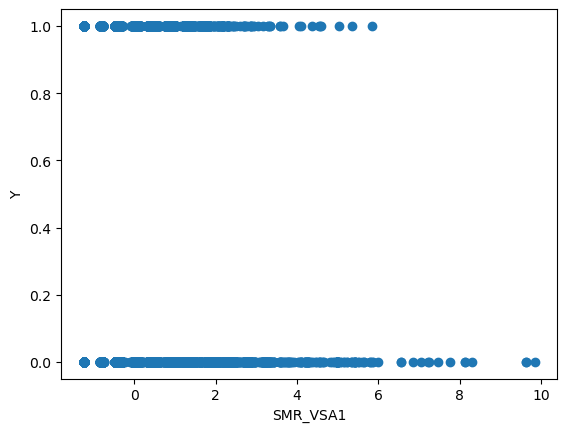

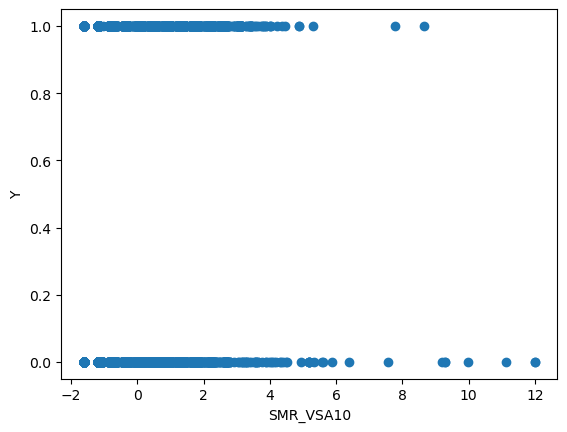

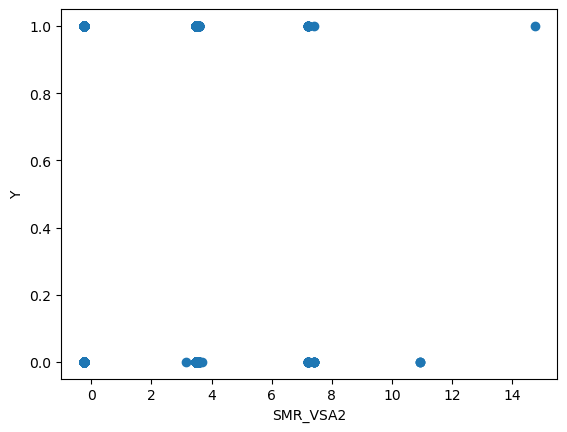

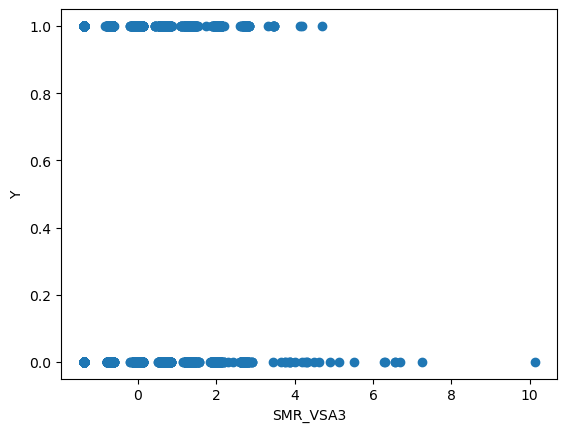

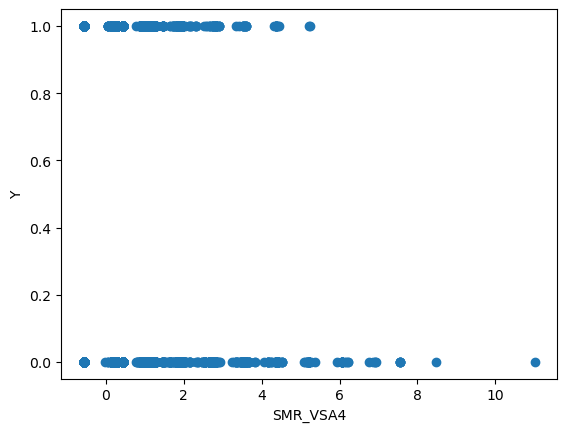

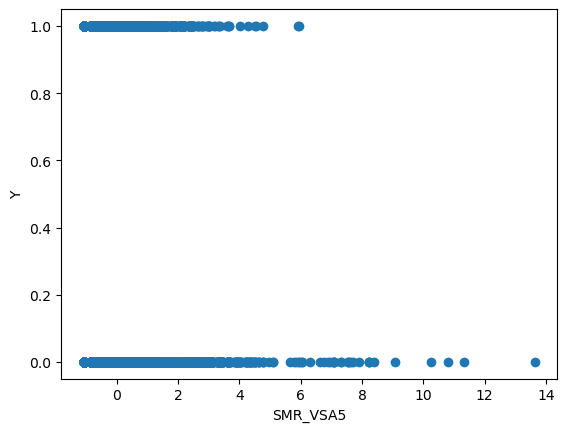

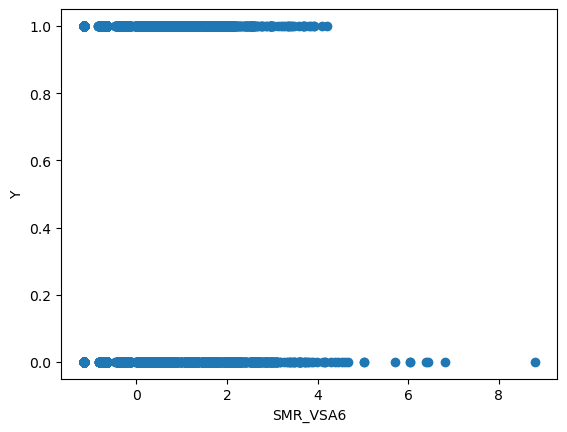

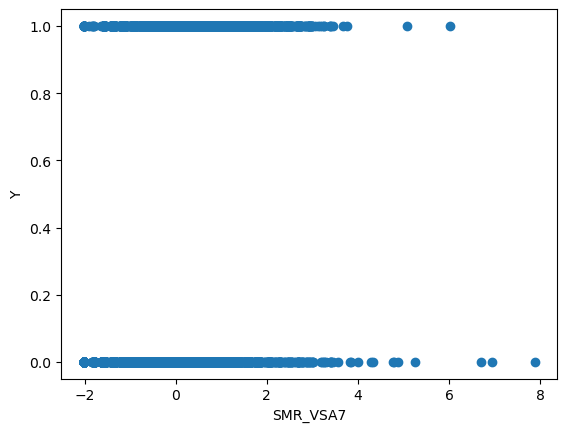

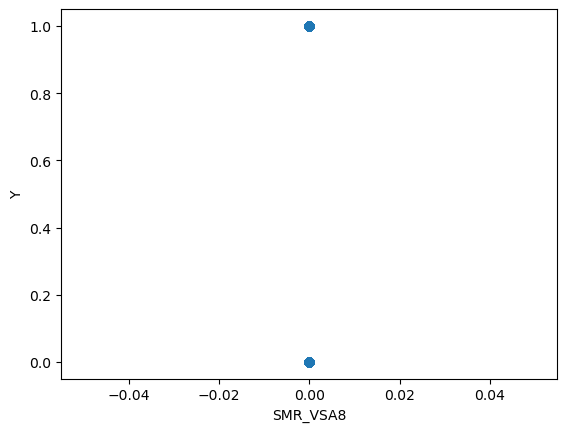

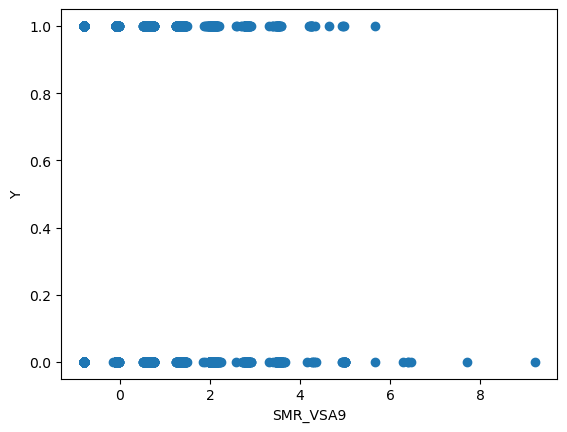

In [235]:
cols_smr_vsa = [col for col in df.columns if 'SMR_VSA' in col]

for col in cols_smr_vsa:
    plt.scatter(df[col], df['Y'])
    plt.xlabel(col)
    plt.ylabel('Y')
    plt.show()

In [236]:
from scipy.stats import shapiro

cols_smr_vsa = [col for col in df.columns if col.startswith('SMR_VSA')]

for col in cols_smr_vsa:
    stat, p = shapiro(df[col])
    
    print(f'Coluna: {col}')
    print(f'Estatística: {stat:.3f}, P-value: {p:.3f}')

    if p > 0.05:
        print('Apresenta distribuição normal')
    else:
        print('Não apresenta distribuição normal')
    print()

Coluna: SMR_VSA1
Estatística: 0.856, P-value: 0.000
Não apresenta distribuição normal

Coluna: SMR_VSA10
Estatística: 0.915, P-value: 0.000
Não apresenta distribuição normal

Coluna: SMR_VSA2
Estatística: 0.255, P-value: 0.000
Não apresenta distribuição normal

Coluna: SMR_VSA3
Estatística: 0.929, P-value: 0.000
Não apresenta distribuição normal

Coluna: SMR_VSA4
Estatística: 0.617, P-value: 0.000
Não apresenta distribuição normal

Coluna: SMR_VSA5
Estatística: 0.812, P-value: 0.000
Não apresenta distribuição normal

Coluna: SMR_VSA6
Estatística: 0.909, P-value: 0.000
Não apresenta distribuição normal

Coluna: SMR_VSA7
Estatística: 0.985, P-value: 0.000
Não apresenta distribuição normal

Coluna: SMR_VSA8
Estatística: 1.000, P-value: 1.000
Apresenta distribuição normal

Coluna: SMR_VSA9
Estatística: 0.786, P-value: 0.000
Não apresenta distribuição normal



/Users/tiago_silva/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/tiago_silva/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [237]:
from sklearn.preprocessing import StandardScaler

cols_BCT = df.filter(regex='^BCUT2D_').columns

scaler = StandardScaler()
df[cols_BCT] = scaler.fit_transform(df[cols_BCT])
df[cols_BCT]


,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW
0,0.628369,0.689156,-0.459129,-0.931751,-0.006372,-0.830244,-0.276373,-0.547099
1,0.408016,1.142018,0.240010,0.101821,0.019372,-0.217443,1.186826,-0.544792
2,0.628367,0.645623,-0.972379,1.524761,-0.276021,2.568004,-0.281131,2.938120
3,-0.662878,-0.185624,0.523751,-1.181291,0.408903,-0.944369,-1.130680,0.062936
4,-0.662884,0.627999,-0.930363,0.805374,-0.939545,0.124227,-0.801412,-0.564394
...,...,...,...,...,...,...,...,...
12508,-0.676336,-1.981319,1.871490,-1.199806,1.276920,-0.884234,-0.522878,-0.617268
12509,-0.643490,-1.904398,2.759673,-1.697786,2.047372,-1.517744,-0.527783,-0.968440
12510,-0.643491,-1.904369,2.755412,-1.697657,2.037189,-1.517941,-0.527774,-0.968434
12511,-0.672118,-2.091672,2.065746,-1.467742,1.478372,-1.270615,-0.522679,-0.663000


In [238]:
df_filtered = df.loc[df['Y'] == 1].filter(regex='^BCUT2D_')

col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: BCUT2D_LOGPLOW
Coluna com menor média: BCUT2D_CHGHI


In [239]:
df_filtered = df.loc[df['Y'] == 0].filter(regex='^BCUT2D_')

col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: BCUT2D_CHGHI
Coluna com menor média: BCUT2D_LOGPLOW


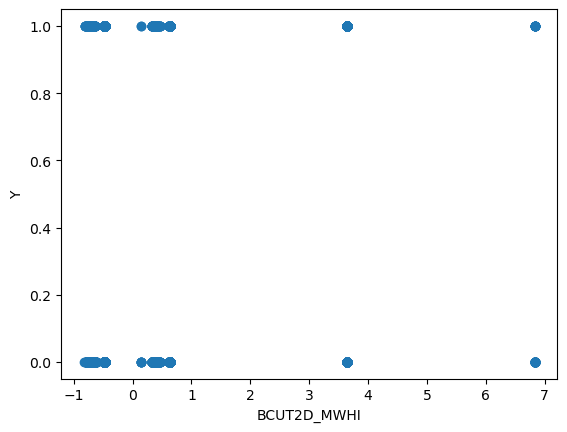

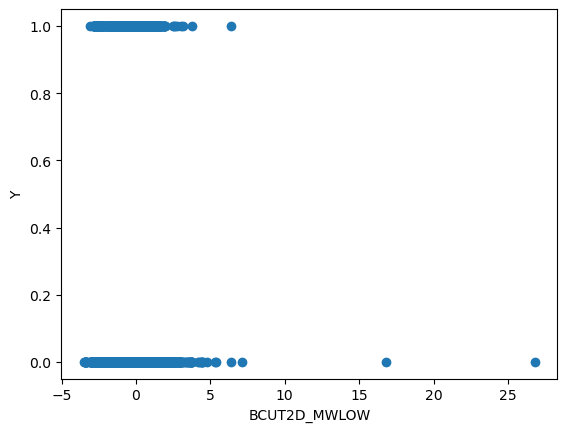

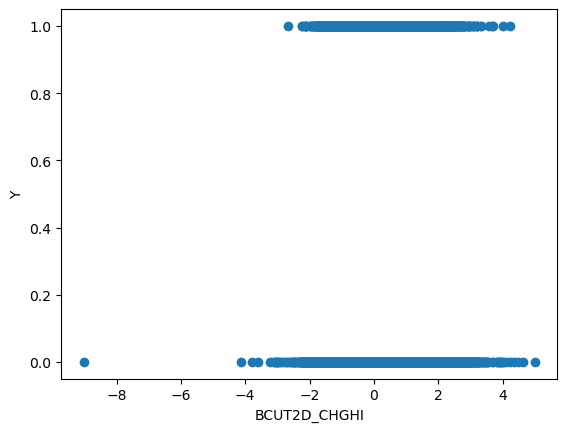

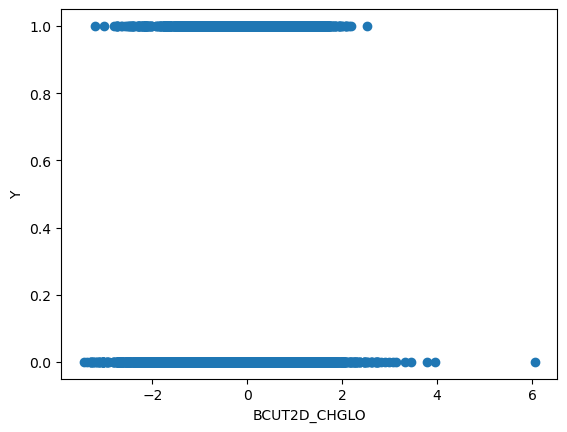

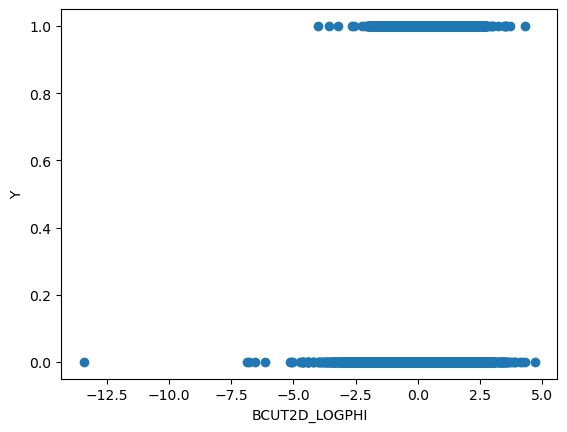

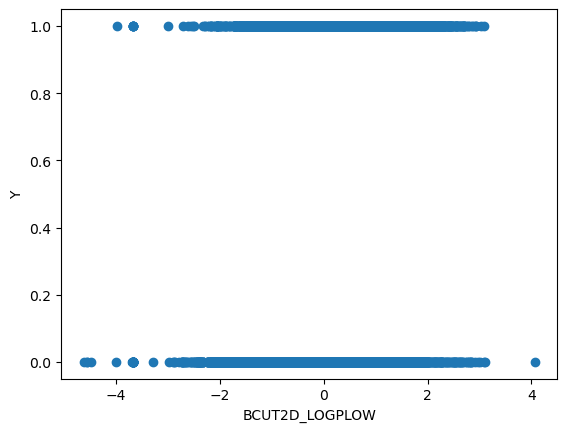

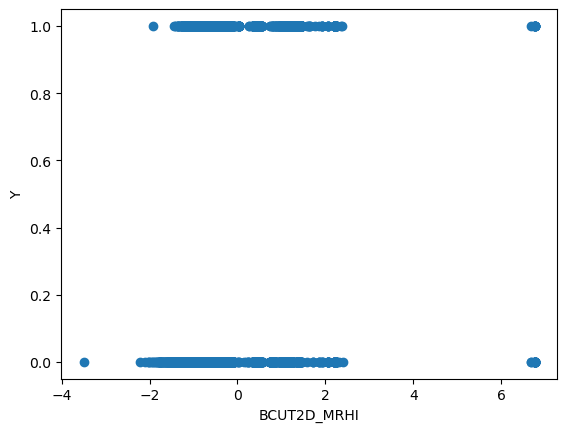

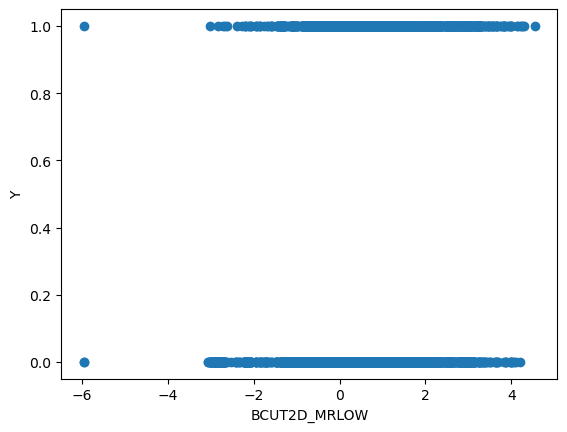

In [240]:
cols_smr_vsa = [col for col in df.columns if 'BCUT2D_' in col]

for col in cols_smr_vsa:
    plt.scatter(df[col], df['Y'])
    plt.xlabel(col)
    plt.ylabel('Y')
    plt.show()

In [241]:
cols_bct = [col for col in df.columns if col.startswith('BCUT2D_')]

for col in cols_bct:
    stat, p = shapiro(df[col])
    
    print(f'Coluna: {col}')
    print(f'Estatística: {stat:.3f}, P-value: {p:.3f}')

    if p > 0.05:
        print('Apresenta distribuição normal')
    else:
        print('Não apresenta distribuição normal')
    print()

Coluna: BCUT2D_MWHI
Estatística: 0.623, P-value: 0.000
Não apresenta distribuição normal

Coluna: BCUT2D_MWLOW
Estatística: 0.898, P-value: 0.000
Não apresenta distribuição normal

Coluna: BCUT2D_CHGHI
Estatística: 0.953, P-value: 0.000
Não apresenta distribuição normal

Coluna: BCUT2D_CHGLO
Estatística: 0.967, P-value: 0.000
Não apresenta distribuição normal

Coluna: BCUT2D_LOGPHI
Estatística: 0.967, P-value: 0.000
Não apresenta distribuição normal

Coluna: BCUT2D_LOGPLOW
Estatística: 0.993, P-value: 0.000
Não apresenta distribuição normal

Coluna: BCUT2D_MRHI
Estatística: 0.814, P-value: 0.000
Não apresenta distribuição normal

Coluna: BCUT2D_MRLOW
Estatística: 0.902, P-value: 0.000
Não apresenta distribuição normal



/Users/tiago_silva/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


MaxEStateIndex    17.398045
Y                       Y=1
dtype: object
11.28983880024118


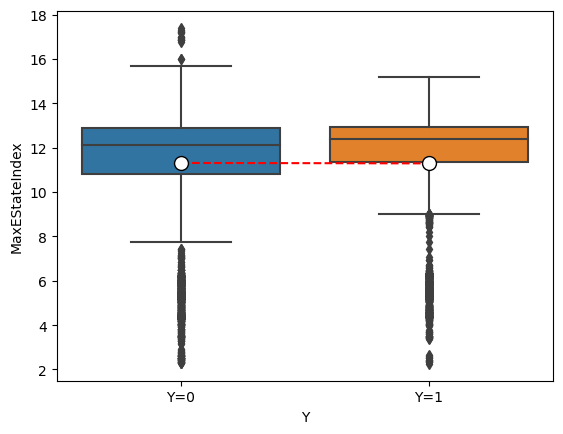

In [242]:
import seaborn as sns

df_boxplot = pd.DataFrame({'MaxEStateIndex': df['MaxEStateIndex'],
                           'Y': df['Y'].replace({1: 'Y=1', 0: 'Y=0'})})
print(df_boxplot.max())

mean_y1 = df_inhibits['MaxEStateIndex'].mean()
print(mean_y1)
mean_y0 = df_not_inhibits['MaxEStateIndex'].mean()

sns.boxplot(x='Y', y='MaxEStateIndex', data=df_boxplot, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.plot([0, 1], [mean_y0, mean_y1], marker='o', color='red', linestyle='--')

plt.show()

In [243]:
df.loc[df['MaxEStateIndex'].nlargest(5).index, ['MaxEStateIndex', 'BCUT2D_MWHI', 'Y']]

,MaxEStateIndex,BCUT2D_MWHI,Y
4079,17.398045,-0.480912,0
6101,17.291803,-0.480831,0
6375,17.254177,-0.480832,0
6463,17.218649,0.402478,0
6232,17.207659,0.628365,0


Text(0, 0.5, 'BCUT2D_CHGHI')

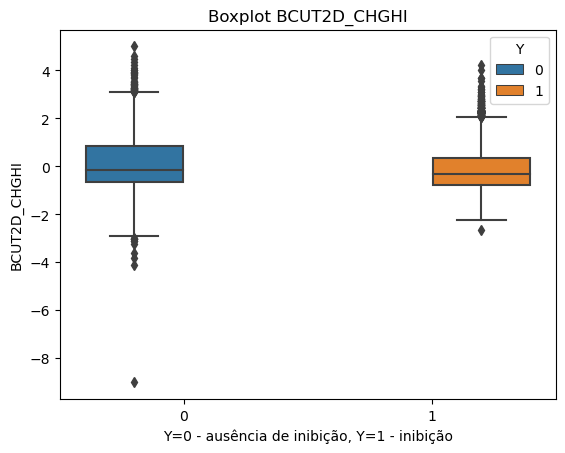

In [244]:
sns.boxplot(data=df, x = 'Y', y ='BCUT2D_CHGHI', hue = 'Y')
plt.title("Boxplot BCUT2D_CHGHI")
plt.xlabel("Y=0 - ausência de inibição, Y=1 - inibição")
plt.ylabel("BCUT2D_CHGHI")

Text(0, 0.5, 'BCUT2D_LOGPLOW')

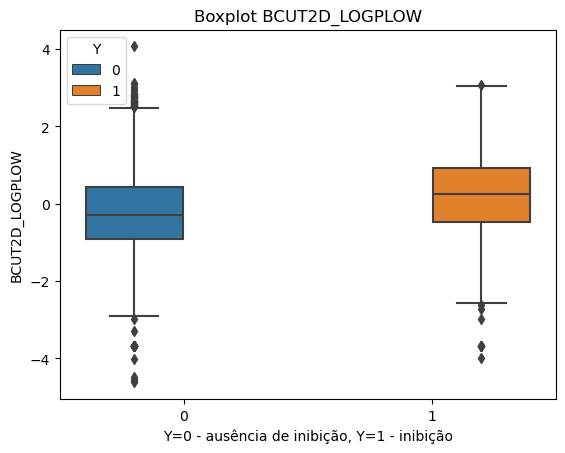

In [245]:
sns.boxplot(data=df, x = 'Y', y ='BCUT2D_LOGPLOW', hue = 'Y')
plt.title("Boxplot BCUT2D_LOGPLOW")
plt.xlabel("Y=0 - ausência de inibição, Y=1 - inibição")
plt.ylabel("BCUT2D_LOGPLOW")

## Análise Estatística Univariada

Descritores químicos escolhidos:

In [246]:
cols_t = [col for col in selected_data.columns]

for col in cols_t:
    stat, p = shapiro(df[col])
    
    print(f'Coluna: {col}')
    print(f'Estatística: {stat:.3f}, P-value: {p:.3f}')

    if p > 0.05:
        print('Apresenta distribuição normal')
    else:
        print('Não apresenta distribuição normal')
    print()

Coluna: BertzCT
Estatística: 0.939, P-value: 0.000
Não apresenta distribuição normal

Coluna: MaxEStateIndex
Estatística: 0.774, P-value: 0.000
Não apresenta distribuição normal

Coluna: MinEStateIndex
Estatística: 0.800, P-value: 0.000
Não apresenta distribuição normal

Coluna: MaxAbsEStateIndex
Estatística: 0.774, P-value: 0.000
Não apresenta distribuição normal

Coluna: MinAbsEStateIndex
Estatística: 0.751, P-value: 0.000
Não apresenta distribuição normal

Coluna: MaxPartialCharge
Estatística: 0.982, P-value: 0.000
Não apresenta distribuição normal

Coluna: MinPartialCharge
Estatística: 0.874, P-value: 0.000
Não apresenta distribuição normal

Coluna: TPSA
Estatística: 0.839, P-value: 0.000
Não apresenta distribuição normal

Coluna: qed
Estatística: 0.967, P-value: 0.000
Não apresenta distribuição normal

Coluna: NumValenceElectrons
Estatística: 0.903, P-value: 0.000
Não apresenta distribuição normal

Coluna: MolWt
Estatística: 0.909, P-value: 0.000
Não apresenta distribuição normal


/Users/tiago_silva/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As colunas selecionadas não apresentam normalidade nos dados, por isso, seguimos com testes não paramétricos.

In [247]:
df_features_tranposed = df_features.transpose()
df_features_tranposed

,0,1,2,3,4,5,6,7,8,9,...,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512
MaxEStateIndex,11.609395,12.610409,6.126257,5.719940,12.040634,12.762343,13.082813,12.850702,5.838888,11.219078,...,13.098029,12.848059,12.734144,12.762526,13.015119,12.346902,13.390758,12.817440,13.179767,10.715530
MinEStateIndex,0.000000,-3.973681,0.660427,-0.219974,-0.208718,-0.533851,-0.044883,-0.112825,0.144975,-0.045417,...,-0.872460,-0.828768,-0.900688,-0.822066,-0.797633,-0.801800,-1.019880,-0.985371,-1.161112,-0.480844
MaxAbsEStateIndex,11.609395,12.610409,6.126257,5.719940,12.040634,12.762343,13.082813,12.850702,5.838888,11.219078,...,13.098029,12.848059,12.734144,12.762526,13.015119,12.346902,13.390758,12.817440,13.179767,10.715530
MinAbsEStateIndex,0.000000,0.072387,0.660427,0.075509,0.006714,0.182110,0.018472,0.000000,0.144975,0.045417,...,0.057204,0.030949,0.013127,0.029437,0.004523,0.024123,0.162294,0.131139,0.077392,0.139962
qed,0.884168,0.720978,0.756902,0.605920,0.728361,0.757037,0.457249,0.506101,0.396056,0.723254,...,0.783379,0.739843,0.576107,0.673255,0.742815,0.682518,0.455270,0.406549,0.772281,0.773508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiazole,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_thiocyan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_thiophene,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fr_unbrch_alkane,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [248]:
print(df_features_tranposed.shape)
print(df_cyp2c19.shape)

(208, 12513)
(12513, 3)


## Testes estatísticos

### Teste Qui-quadrado

Para a análise estatística univariada usamos testes estatísticos para identificar compostos com características diferentes em relação à variável "Y" (entre composto que inibem ou não inibem). 

H0: Não existem diferenças significativas entre a propriedade do composto químico e a inibição deCYP2C19.

H1: Existem diferenças significativas entre a propriedade do composto químico e a inibição de CYP2C19.

In [249]:
pvalues = []
for col in df.columns:
    sel_cols = df.iloc[:, 3:126]
    if col in sel_cols:
        contingency_table=pd.crosstab(df[col], df['Y'])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        pvalues.append(p_value)
        if p_value < 0.05:
            print(f"O descritor químico {col} tem expressão diferencial significativa com p-value: {p_value}")
        else:
            print(f"O descritor químico {col} não tem expressão diferencial significativa com p-value: {p_value}")

sign = len(df[df['Y'] == 0]) + len(df[df['Y'] == 1])
sign
        
        #not_inibited = df[df['Y'] == 0][col]
        #inibited = df[df['Y'] == 1][col]
        #p_value = chi_ind(not_inibited, inibited)[1]
        #if p_value < 0.05:
         #   print(f" O descritor químico {col} tem expressão diferencial significativa com  p-value: {p_value}")
        #else:
         #   print(f" O descritor químico {col} não tem expressão diferencial significativa com p-value: {p_value}")

#sign = len(not_inibited+inibited) 
#sign

O descritor químico MaxEStateIndex não tem expressão diferencial significativa com p-value: 0.06902245553392261
O descritor químico MinEStateIndex tem expressão diferencial significativa com p-value: 0.0437611271965757
O descritor químico MaxAbsEStateIndex não tem expressão diferencial significativa com p-value: 0.06902245553392261
O descritor químico MinAbsEStateIndex tem expressão diferencial significativa com p-value: 0.0411145933288604
O descritor químico qed tem expressão diferencial significativa com p-value: 2.8281147731386506e-06
O descritor químico MolWt tem expressão diferencial significativa com p-value: 1.4539242176416733e-19
O descritor químico HeavyAtomMolWt tem expressão diferencial significativa com p-value: 9.30289157263313e-43
O descritor químico ExactMolWt tem expressão diferencial significativa com p-value: 1.3816622999308828e-19
O descritor químico NumValenceElectrons tem expressão diferencial significativa com p-value: 8.410387238182544e-88
O descritor químico Num

12513

In [250]:
descritores = df.iloc[:,3:126:]

sign=[]
not_sign=[]
count = 0
for x, t in enumerate(descritores):
    not_inibited = df[df['Y'] == 0][t]
    inibited = df[df['Y'] == 1][t]
    p_value = ttest_ind(not_inibited, inibited)[1]
    if p_value < 0.05:
        count += 1
        sign.append(t)
    else:
        not_sign.append(t)

significativa = len(sign+not_sign) - count - 1

print(f"Grupos funcionais com expressão diferencial signficativa: {len(sign)}")
print(f"Grupos funcionais com expressão diferencial não signficativa: {len(not_sign)}")
print(f"Lista de grupos funcionais com expressão diferencial signficativa: {sign}")
print(f"Lista de grupos funcionais com expressão diferencial não signficativa: {not_sign} ")



Grupos funcionais com expressão diferencial signficativa: 107
Grupos funcionais com expressão diferencial não signficativa: 16
Lista de grupos funcionais com expressão diferencial signficativa: ['MinEStateIndex', 'MinAbsEStateIndex', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'S

H0: A quantidade de grupos funcionais em cada composto tem influência na inibição do gene de estudo CYP2C19.

H1: A quantidade de grupos funcionais em cada composto não tem influencia na inibição do gene de estudo CYP2C19.

In [251]:
compostos = df.iloc[:, 126:]
compostos1 = compostos.insert(loc = 0,
          column = 'Y',
          value = df["Y"])
sign = []
not_sign = []
count=0
for x, y in enumerate(compostos):
    a = pd.crosstab(compostos["Y"],compostos[y])
    b = scipy.stats.chi2_contingency(a)[1]
    if b > 0.05:
        count +=1
        not_sign.append(y)
    else:
        sign.append(y)

significativos = len(sign+not_sign) - count -1
sign.pop(0)
print(f"Grupos funcionais com expressão diferencial signficativa: {significativos}")
print(f"Grupos funcionais com expressão diferencial não signficativa: {count}")
print(f"Lista de grupos funcionais com expressão diferencial signficativa: {sign}")
print(f"Lista de grupos funcionaiscom expressão diferencial não signficativa: {not_sign} ")

Grupos funcionais com expressão diferencial signficativa: 70
Grupos funcionais com expressão diferencial não signficativa: 15
Lista de grupos funcionais com expressão diferencial signficativa: ['fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_aniline', 'fr_aryl_methyl', 'fr_azo', 'fr_benzene', 'fr_bicyclic', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_ketone', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid',

Verifica-se que existem 70 grupos funcionais que têm influência significativa na inibição do gene CYP2C19, e 19 grupos funcionais não têm influência significativa na inibição do gene, para um nível de significância de 0.05.

Observa-se também que os grupos fr_COO2 e fr_benzene estão na lista dos grupos funcionais com expressão diferncial significativa.

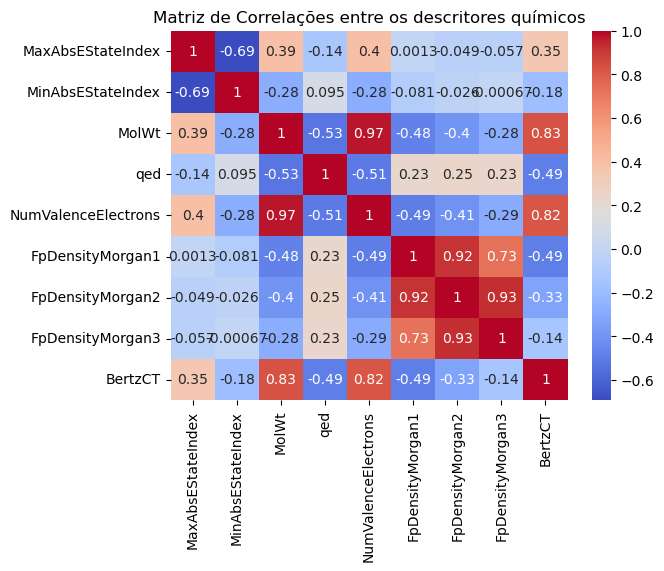

In [252]:
sns.heatmap(df[["MaxAbsEStateIndex","MinAbsEStateIndex", "MolWt", "qed", "NumValenceElectrons", "FpDensityMorgan1", "FpDensityMorgan2", "FpDensityMorgan3", "BertzCT" ]].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlações entre os descritores químicos')
plt.show()

Pela matriz de correlações, observa-se uma correlação acentuada entre os dados FpDensityMorgan1, FpDensityMorgan2 e FpDensityMorgan3, e também entre o MolWT e o NumValenceElectrons. 

## Análise Estatística Multivariada

Análise com todas as variáveis.

Retiramos as colunas categóricas que não são essenciais para esta análise.

In [253]:
df_p = df.drop(["ids", "Y", "smiles"], axis = 1)
df_p

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.609395,0.000000,11.609395,0.000000,0.884168,346.302,321.102,345.13748,124.0,0.0,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
1,12.610409,-3.973681,12.610409,0.072387,0.720978,355.418,346.346,354.96430,114.0,0.0,...,-0.326696,3.306514,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,3.663181,-0.157291,-0.203677
2,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,255.05632,88.0,0.0,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
3,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,421.25900,164.0,0.0,...,-0.326696,-0.281277,-0.109177,-0.059403,9.018047,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
4,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,324.13348,122.0,0.0,...,-0.326696,-0.281277,-0.109177,-0.059403,9.018047,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12508,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,263.11575,102.0,0.0,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
12509,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,397.15253,152.0,0.0,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
12510,12.817440,-0.985371,12.817440,0.131139,0.406549,335.356,314.188,335.13690,130.0,0.0,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677
12511,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,357.15762,138.0,0.0,...,-0.326696,-0.281277,-0.109177,-0.059403,-0.104988,-0.17332,-0.012644,-0.257560,-0.157291,-0.203677


In [254]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_p)
df_scale

print(df_scale.mean())
print(df_scale.std())

#verifica-se que a média se aproxima de zero e o desvio padrão se aproxima de 1.

-6.115239105571069e-18
0.9903379376602873


### Redução de Dimensionalidade - PCA

[0.16956501 0.07236762 0.05473748 0.03637801 0.03449836 0.02821805
 0.02528948 0.02347723 0.02228603 0.01918889 0.01703261 0.01624215
 0.0151236  0.0141333  0.01338629]


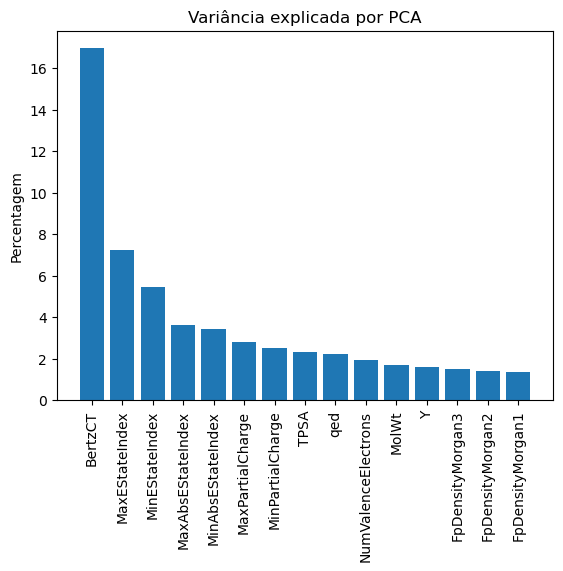

In [255]:
n=15
pca_features = PCA(n_components=n)
pca_features.fit(df_scale)
x_reduced = pca_features.transform(df_scale)


print(pca_features.explained_variance_ratio_)  
plt.bar(range(n), pca_features.explained_variance_ratio_*100)
plt.xticks(range(n), selected_data.columns)
plt.xticks(rotation=90)
plt.title("Variância explicada por PCA")
plt.ylabel("Percentagem")
plt.show()

In [256]:
from sklearn.decomposition import PCA
pca_cyp2c19 = PCA(n_components=20)
pca_cyp2c19.fit(df_scale)
df_pca = pca_cyp2c19.transform(df_scale)

for x in range(2,50):
    if sum(pca_cyp2c19.explained_variance_ratio_) > 0.7:
        break
    n +=1
print('Variância explicada: %s'% str(pca_cyp2c19.explained_variance_ratio_))
print('Soma:', sum(pca_cyp2c19.explained_variance_ratio_) * 100, "%")
print(f"Número de componentes que explicam 70% dos dados: {n}")

Variância explicada: [0.16956501 0.07236762 0.05473748 0.03637801 0.03449836 0.02821805
 0.02528948 0.02347723 0.02228604 0.01918894 0.01703274 0.01624283
 0.01512369 0.0141377  0.01338986 0.01267006 0.01116329 0.01076046
 0.01054814 0.01026459]
Soma: 61.73395680773852 %
Número de componentes que explicam 70% dos dados: 63


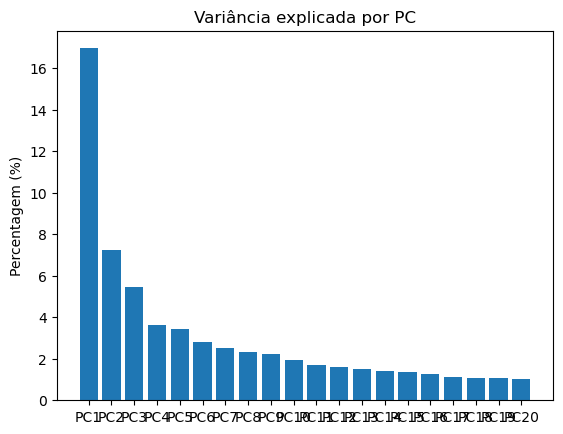

In [257]:
n= 20
plt.bar(range(n), pca_cyp2c19.explained_variance_ratio_ * 100)
plt.xticks(range(n), ["PC"+str(i) for i in range(1, n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem (%)")
plt.show()

In [258]:
pca_cyp2c19 = PCA(n_components=20)
pca_cyp2c19.fit(df_scale)
df_pca = pca_cyp2c19.transform(df_scale)
df_pca

array([[-1.32848015, -1.33133736, -2.66847084, ...,  1.47542186,
        -0.82095629,  1.07494505],
       [-1.30342814, -0.17245294,  3.18557477, ...,  1.62395237,
         1.02744183, -0.67895761],
       [-7.73317126,  4.779929  , -0.71302022, ..., -2.3656809 ,
        -1.37190741, -1.15728588],
       ...,
       [ 4.46619166, -9.99167326, -4.23800169, ..., -0.40978545,
        -0.07580654, -0.55800427],
       [ 4.81523217, -7.75542467, -3.02153767, ...,  1.60406769,
        -0.76852422,  1.71081401],
       [-6.04195886, -3.78633859,  3.16610673, ...,  0.06280177,
        -0.46407513,  1.68680397]])

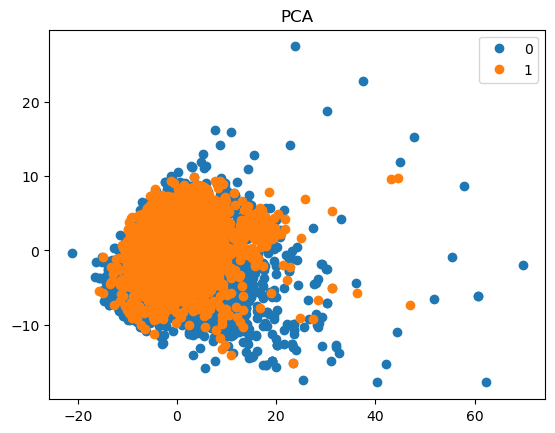

In [259]:
for i in df['Y'].unique():
    sp = df.index[df['Y']==i]-1
    plt.plot(df_pca[sp,0],df_pca[sp,1], 'o' , label=i)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Os resultados do PCA apresentam sobreposição o que pode indicar a presença de variáveis altamente correlacionadas ou redundantes, o que é confirmado em cima pela matriz de correlações. Nesse caso, as variáveis não estão a fornecer informações únicas e independentes sobre os dados, o que pode dificultar a identificação das principais fontes de variação nos dados. 

#### t-SNE

In [260]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(df_scale)

/Users/tiago_silva/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tiago_silva/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


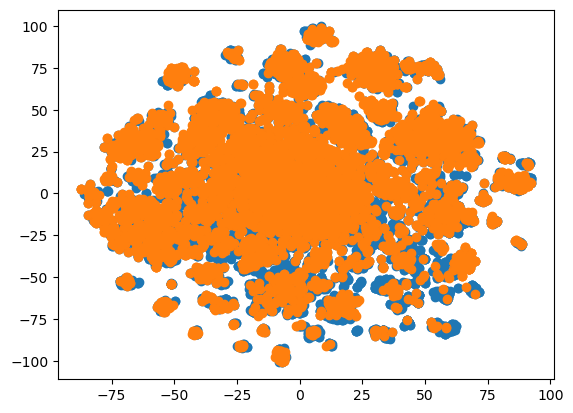

In [261]:
for s in df["Y"].unique():
    sp = df.index[df["Y"] == s]-1
    plt.plot(points[sp,0], points[sp,1], 'o', label = s)
plt.show()

O t-SNE (t-Distributed Stochastic Neighbor Embedding) é uma técnica de visualização de dados que pode ser usada para explorar a estrutura e a relação entre diferentes pontos em um conjunto de dados. 
Quando os dados estão sobrepostos significa que as informações contidas nos dados são muito complexas e características importantes dos dados podem ser de dificil identificação.

### Clustering Hierarquico

Escolhemos as features com mais variâcia explicada por PCA: BertzCT, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex e MinAbsEStateIndex.

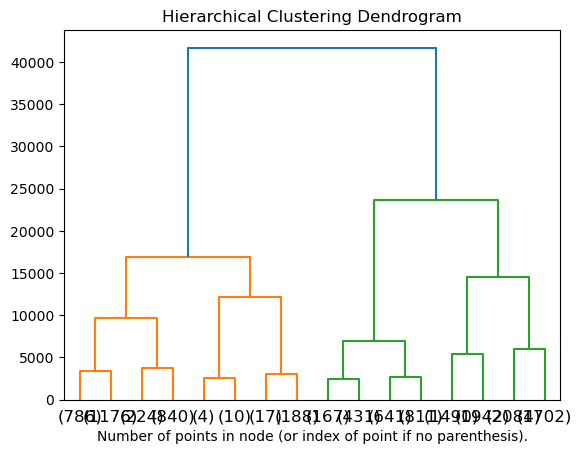

In [262]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(selected_data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### K-Means

In [263]:
from sklearn.cluster import KMeans

k=3
kmeans_meta = KMeans(n_clusters=k, max_iter=1000)
kmeans_meta.fit(df_scale)
labels = kmeans_meta.labels_
centroids = kmeans_meta.cluster_centers_

pd.crosstab(labels,df["Y"], rownames=['clusters'] )

Y,0,1
clusters,,
0,670,176
1,3141,2340
2,2898,3288


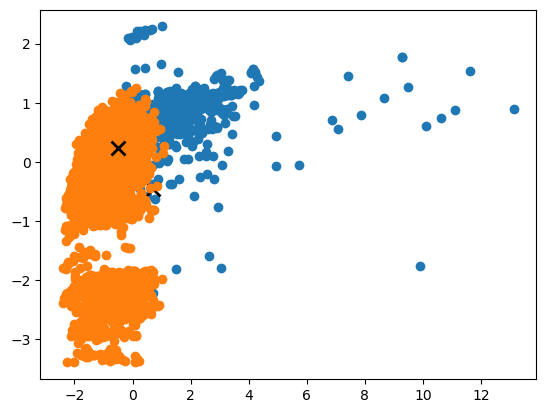

In [264]:
for i in range(k-1):
    
    ds = data_scale[np.where(labels==i)]

    plt.plot(ds[:,0],ds[:,1],'o')

    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')

    plt.setp(lines,ms=10.0)    
    plt.setp(lines,mew=2.0)   
plt.show()

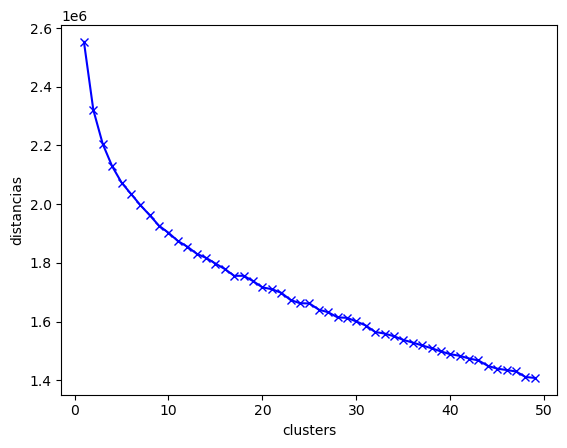

In [265]:
from sklearn.cluster import KMeans
k_values = range(1, 50)
lista = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scale)
    lista.append(kmeans.inertia_)
plt.plot(k_values, lista, 'bx-')
plt.xlabel('clusters')
plt.ylabel('distancias')
plt.show()


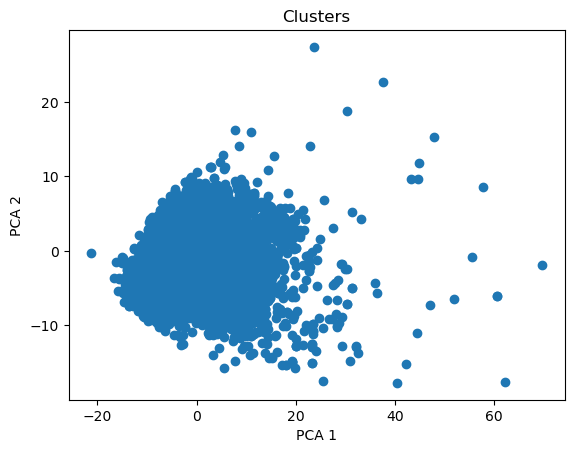

In [266]:
plt.scatter(df_pca[:,0], df_pca[:,1], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters')
plt.show()

# Aprendizagem de maquina

In [357]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

#data_scale = scaler.fit_transform(selected_data)
data_scale_ml = scaler.fit_transform(df_features)

#data_scale.columns = ["MaxEStateIndex","MinEStateIndex","MaxAbsEStateIndex","MinAbsEStateIndex","MaxPartialCharge","MinPartialCharge","NumHAcceptors","NumHDonors","TPSA"]

data_scale_ml

array([[ 0.11577211,  0.60461352,  0.11577211, ..., -0.25756005,
        -0.15729123, -0.20367719],
       [ 0.49200172, -2.12969499,  0.49200172, ...,  3.66318078,
        -0.15729123, -0.20367719],
       [-1.94505724,  1.05905673, -1.94505724, ..., -0.25756005,
        -0.15729123, -0.20367719],
       ...,
       [ 0.56981401, -0.07342512,  0.56981401, ..., -0.25756005,
        -0.15729123, -0.20367719],
       [ 0.70599407, -0.19435318,  0.70599407, ..., -0.25756005,
        -0.15729123, -0.20367719],
       [-0.2201857 ,  0.27374281, -0.2201857 , ..., -0.25756005,
        -0.15729123, -0.20367719]])

In [358]:
from sklearn.model_selection import train_test_split

X = data_scale_ml#already an array
y = df_cyp2c19["Y"].values

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3)


print(len(X_train))
print(len(X_test))

train_in = X_train
train_out = y_train

test_in = X_test
test_out = y_test

8759
3754


## K Neighbours Classifier

In [359]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds = knn.predict(test_in)
print("Valores previstos: ", preds)
print("Valores reais: " , test_out)
print("Perc. acertos: ", (preds == test_out).sum()/len(preds) )

Valores previstos:  [0 0 0 ... 1 1 0]
Valores reais:  [1 0 0 ... 1 0 0]
Perc. acertos:  0.7765050612679808


In [360]:
# matriz de confusão

from sklearn.metrics import confusion_matrix
confusion_matrix(test_out, preds)

array([[1522,  462],
       [ 377, 1393]])

In [361]:
# f1-score
# F1 = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import f1_score
f1_score(test_out, preds, pos_label = 1)

0.768551724137931

## Naive Bayes

In [362]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(train_in, train_out)
print(gnb_model)

print("Valores previstos: " , gnb_model.predict(test_in))
print("Valores reais: " , test_out)

print("Perc. acertos: ", (gnb_model.predict(test_in) == test_out).sum()/len(gnb_model.predict(test_in)) )

GaussianNB()
Valores previstos:  [1 0 1 ... 1 1 1]
Valores reais:  [1 0 0 ... 1 0 0]
Perc. acertos:  0.5756526371870005


## Decision Tree

In [363]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Perc. acertos: ", (preds_tree == test_out).sum()/len(preds_tree) )
print("Matriz de confusão: ")
print(confusion_matrix(test_out, preds_tree) )
print("F1: ", f1_score(test_out, preds_tree, pos_label = 1))

Perc. acertos:  0.7221630261054874
Matriz de confusão: 
[[1481  503]
 [ 540 1230]]
F1:  0.7022552098201542


## Support Vector Machine

In [364]:
from sklearn import svm

svm_model = svm.SVC(gamma=0.001, C=100.)

svm_model = svm_model.fit(train_in, train_out)
preds_svm = svm_model.predict(test_in)

print("Perc. acertos: ", (preds_svm == test_out).sum()/len(preds_svm) )
print("Matriz de confusão: ")
print(confusion_matrix(test_out, preds_svm) )
print("F1: ", f1_score(test_out, preds_svm, pos_label = 1))

Perc. acertos:  0.8082045817794352
Matriz de confusão: 
[[1607  377]
 [ 343 1427]]
F1:  0.7985450475657526


## Random Forests

In [365]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(train_in, train_out)

r2 = model.score(test_in, test_out)
r2

0.45963001386444313

# DEEP LEARNING nao esta a funfar

In [370]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_dim=208))  # Example input layer
model.add(Dense(units=32, activation='relu'))  # Example hidden layer
model.add(Dense(units=1, activation='sigmoid'))  # Example output layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print("\n" "Loss:", loss, "\n"
      "Accuracy:", accuracy)

Epoch 1/10
274/274 [==============================] - 0s 609us/step - loss: 0.5135 - accuracy: 0.7492
Epoch 2/10
274/274 [==============================] - 0s 814us/step - loss: 0.4274 - accuracy: 0.8068
Epoch 3/10
274/274 [==============================] - 0s 580us/step - loss: 0.3995 - accuracy: 0.8241
Epoch 4/10
274/274 [==============================] - 0s 733us/step - loss: 0.3754 - accuracy: 0.8379
Epoch 5/10
274/274 [==============================] - 0s 580us/step - loss: 0.3566 - accuracy: 0.8439
Epoch 6/10
274/274 [==============================] - 0s 716us/step - loss: 0.3385 - accuracy: 0.8523
Epoch 7/10
274/274 [==============================] - 0s 580us/step - loss: 0.3205 - accuracy: 0.8639
Epoch 8/10
274/274 [==============================] - 0s 648us/step - loss: 0.3062 - accuracy: 0.8694
Epoch 9/10
274/274 [==============================] - 0s 690us/step - loss: 0.2918 - accuracy: 0.8784
Epoch 10/10
118/118 [==============================] - 0s 435us/step - loss: 0.489

In [368]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                13376     
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 15,489
Trainable params: 15,489
Non-trainable params: 0
_________________________________________________________________
